# Chapitre 4: Training models

In this chapter we will deep dive more on the underlying functionning of the training phase in our projects. First we will focus on linear regression model
by looking at the 2 differents ways of training them: with a closed equation(computing the best set of parameters to take) or using algorithms like 
gradient descent to iteratively tweak the model until the cost function is optimally minimized. After that we will look into other models such as logistic
regression, soft max regression for classification  problems and polynomial regression which is more fit to more non linear relationships.

## Linear Regression

This is a linear function of parameter theta1 and theta2, it simply does a prediction by computing a weighted sum of the parameters plus a bias term theta0.
To train the model we have already saw that we need to determine the best set of hyperparameters to apply to it. In a previous chapter we determine that the
__Root Mean Squared Error__ is the most common perfomance measure algorithms for regression models. So we need to find the value of theta that minimize the
mean squared error(we are going to use this one because it results in the same thing than minimizing its root). For that first we are going to use a closed
form equation(called the __normal equation__) that gives the result directly:  
theta = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y  
y is the vector that contains the target values.


In [1]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
# Here we are just generating a set of random values that are linear looking to test our method in
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
# Now we are going to compute theta using the normal equation above
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(F"theta: {theta_best}")

theta: [[4.21509616]
 [2.77011339]]


Now we can make predictions using this set of parameters.

[[4.21509616]
 [9.75532293]]


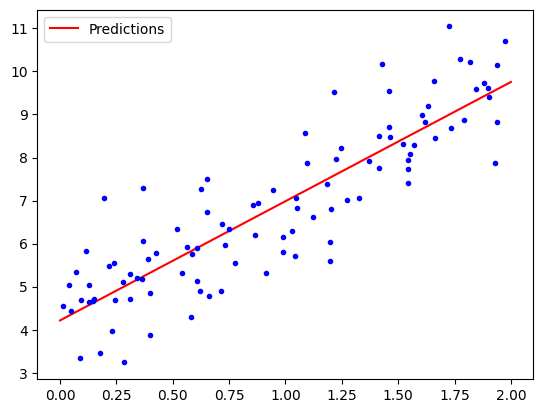

In [5]:
import matplotlib.pyplot as plt

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best

print(y_predict)
# Lets plot the predictions
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.show()

Computing a linear regression is the same as in previous chapters:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"bias term: {lin_reg.intercept_}\nweights: {lin_reg.coef_}")
lin_reg.predict(X_new)

bias term: [4.21509616]
weights: [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

Now we will look at how to train our linear regression using gradient descent. Gradient descent is an algorithm that set its starting point at a random
value then gradually tweak this value until it gets a minimum (in the cost function) is attained. This is the gradient of the cost function we are going to
use:  
$$\frac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \frac{2}{m} \sum_{i=1}^m (\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)}) x_j^{(i)}$$
Lets look at an implementation of this algorithm:

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):# Each iteration over the training set is called an epoch
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

# Let's verify that this works as well as the normal equation(it should find the same value as above)
print(f"theta: {theta}")

theta: [[4.21509616]
 [2.77011339]]


The problem with using the __batch gradient descent__ method is that it uses the whole training set at every iteration which is very slow. Instead we can
use __stochastic gradient descent__ that picks a training instance randomly at each iteration and tweak out the value of the parameter until it finds the 
global minimum. The downside is that it is less reliable than batch gradient descent due to its randomness it can localize the global minimum but keep
optimizing(but ultimately ending very close to that point). One solution is to gradually decrease the learning rate:

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t): # Determine the learning rate at every iteration
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

print(f"theta: {theta}")# pretty close to the one found by the two other methods

theta: [[4.21076011]
 [2.74856079]]


Alternatively we can use scikit-learn's _SGDRegressor()_ to implement a stochastic gradient descent and find the best value for theta.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel return the 2D array in 1 dimension
print(f"bias term: {sgd_reg.intercept_}\nweights: {sgd_reg.coef_}")

bias term: [4.21278812]
weights: [2.77270267]


## Polynomial Regression

This type of model is used when the dataset possess non linear relationships. In order to make a linear model fit a non linear dataset, we can use
scikit-learn's _PolynomialFeatures()_ to transform the dataset's feature into their root square and add them to the training set.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.3 * X**2 + X + 2 + np.random.randn(m, 1)
# the code above just generate a random set of non linear data
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
# Now we can train a linear regression model on this dataset with extended features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(f"bias term: {lin_reg.intercept_}\nweights: {lin_reg.coef_}")

[-0.75275929]
[-0.75275929  0.56664654]
bias term: [1.78134581]
weights: [[0.93366893 0.36456263]]


## Evaluating performance using the learning curves

The learning curves are plots of the model's training and validation error meaning we are evaluating the model at different intervals on both the training
and the validation set. Scikit-learn has a _learning\_curve()_ function for this, it train and evaluate the function using cross-validation 

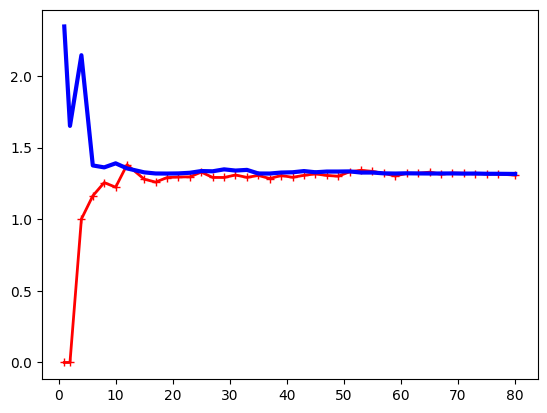

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

As we can see the model overfits the data. At first the error rate on the training set is 0 for the first two instances and after that it goes up
drastically. That's because the data is non linear and noisy(meaning it contains a lot of randomness (it was generated randomly anyway)). Let's test with
a 10th degree polynomial model on our dataset.

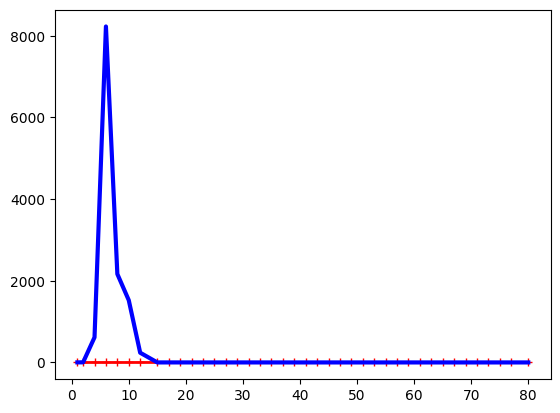

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")


train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

## Regularizing models to reduce overfitting

A way to reduce overfitting is to constraint the model (for our polynomial model it would mean reducing its degree and for a linear model it would mean
reducing its weight), let's look at a few strategy of regularization.

### Ridge regression

This is a regularized version of linear regression in which we add a _regularization term_ to the mean squared error equation, the regularization term is
defined as follows:
$$J(\theta) = MSE(\theta) + \frac{\alpha}{m} \sum_{i=1}^n \theta_i^2$$  
Note that this version should be used in the training set and we should use the RMSE on the validation set. The parameter $\alpha$ controls how much we 
want to regularize the model, if it is 0 then the equation becomes linear regression and if it is too large then the data becomes a flat line around the 
mean.  
__Side Note__: It is important to scale the data using the _StandardScaler()_ before applying the ridge regression to the training data.  
Now let's compute ridge regression using a closed form equation:

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.24530844]])

And using schotastic gradient descent:

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.24498151])

### Lasso Regression

The __Least Absolute Shrinkage and Selection Operator regression__ is another regularized version of linear regression but the term added to the MSE is the
following:  
$$J(\theta) = MSE(\theta) + 2\alpha \sum_{i=1}^{n} \left\lvert \theta_i \right\rvert$$  

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]]) # For using the sgd we should added the parameter penalty="l1" and alpha=0.1

array([4.19254535])

### Elastic Net Regression

The regularization term is the weighted sum of the lasso and ridge regression's term:  
$$J(\theta) = MSE(\theta) + r(2\alpha \sum_{i=1}{n} \left\lvert \theta_i \right\rvert) + (1 - r)(\frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2)

### Early Stopping

The concept is simple, once the model hits the minimum level of errors we stop its training. The way to do that is to continue training during the phase
where is the RMSE is decreasing and when it start to go up again we stop training the model. Here is an implementation of such method:

e:\Notes\handsonml\mlnotes\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Notes\handsonml\mlnotes\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Notes\handsonml\mlnotes\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Notes\handsonml\mlnotes\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

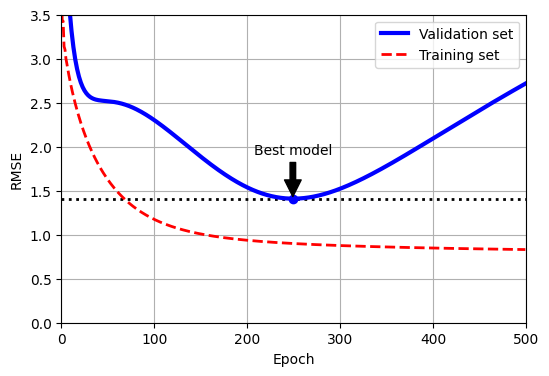

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model', xy=(best_epoch, best_valid_rmse), xytext=(best_epoch, best_valid_rmse + 0.5), ha="center", arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

### Logistic Regression

Logistic regression is a classification algorithm that evaluate the probabilities of an instance to belong to a certain class. Just like linear regression
it computes a weighted sum of the input features. Here is the formula its obeys:
$$\hat{p} = h_\theta (\mathbf{x}) = \sigma(\boldsymbol{\theta}^T\mathbf{x})$$
The logistic (noted $\sigma$ here) is a function that outputs a number between 0 and 1 and is define as follows:
$$ \sigma(t) = \frac{1}{1 + exp(-t)} $$
So the objective of the algorithm is to find $\hat{p}$ which is the probability that a given instance x belong to a class. To illustrate the functionning of
the algorithm we are going to use the iris dataset which contains the sepals and petals length of different types of iris. We are going to build a model
capable of classifying a given flower's to be an _iris virginica_ using its petals and sepals lengh:

[[0.        ]
 [0.003003  ]
 [0.00600601]]


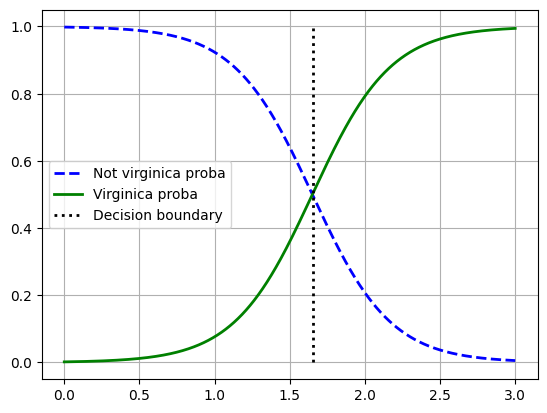

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Let's see the probabilities of flowers with petals width between 0 to 3 cm to be an iris virginica
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
print(X_new[:3])
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.legend(loc="center left")
plt.grid(visible=True)
plt.show()

__Important Note__: Logistic regression can be regularized using the same techniques as mentionned earlier.

### SoftMax Regression

Softmax regression is just a logistic regression made to handle multiple classes without having to train multiple binary classifier. The concept works as
follows:  
When given an instance __x__ it computes a score $s_k(x)$ for each class k it then estimates the probability for each class by applying the
_softmax function_ which is defined as follows:
$$s_k(x) = (\theta^{(k)})^Tx$$
Once the score of every class k is computed we can calculate the probability $\hat{p}$ that an instance belong to that class.
$$ \hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K}exp(s_j(x))} $$
Let's use our previous dataset and classify the iris in all 3 classes.

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])